In [3]:
# Problem 1: Analysis of Particle Swarm Optimisation (a)(c) (20%)

# Packages
import numpy as np
import random as rand
import matplotlib.pyplot as plt

# Functions
def epsilon_close(x, y):
    return abs(x - y) < 10

def sphere(d, x):
    return np.sum(x**2)

def rastrigin(d, x):
    return 10 * d + np.sum(x**2 - 10 * np.cos(2 * np.pi * x))

# Constants
d     = 8                  # Dimension
N     = 80                 # Number of particles
b     = 5.12               # Range
a     = 3.7894736842105257 # S 3.789473684210525   R 2.1315789473684195
a1    = 1.989736842105263  # S 1.989736842105263   R 1.2499999999999991
a2    = 1.799736842105262  # S 1.799736842105262   R 0.8815789473684204
w     = -0.005             # S 0.303947368421052   R -0.342105263157894
alpha = 0.0                # S R 

f          = rastrigin  # Objective function.
res        = 1          # Number of test values of q.
iterations = 150        # Maximum number of PSO iterations
trials     = 50         # Number of trials for a given value of q

# Flags
mod = True

# Search intervals for a parameter q
q1center = 0.9; q1size = 0.1
Q1 = np.linspace(q1center - q1size, q1center + q1size, res)
q2center = 1.969736842105263   ; q2size = 0.02
Q2 = np.linspace(q2center - q2size, q2center + q2size, res)

# Search over parameter q
F_G  = np.zeros(res) # Fitness global bests over q1 and q2
ITER = np.zeros(res) # Number of iterations over q1 and q2 over all trials

for j in range(res): # For every test value of q1
    for _ in range(trials): # For every trial
        # Mutable state   
        X         = np.array([np.array([rand.uniform(-b, b) for _ in range(d)]) for _ in range(N)]) # Pos
        V         = np.array([np.zeros(d) for _ in range(N)])                                       # Vel
        P         = np.array([x for x in X])                                                        # Pos PB
        F_p       = np.array([f(d, p) for p in P])                                                  # PB fitness
        g         = P[np.argmin(F_p)]                                                               # Pos GB
        f_g       = np.min(F_p)                                                                     # GB fitness
        t         = 0                                                                               # Internal iteration counter
        converged = False                                                                           # Converged flag
        W         = np.ones((N, d))                                                                 # Inertial weights

        # Find minimum of objective function
        for itr in range(iterations):

            # Calculate fitness and update PBs and GB
            for i, x in enumerate(X):
                f_i = f(d, x)
                if f_i < F_p[i]: # Personal best
                    P[i] = x
                    F_p[i] = f_i
                if f_i < f_g: # Global best
                    g = x
                    f_g = f_i
                    t = 0 # Reset time since last GB

            # Update inertial parameter
            if mod:
                ISA = np.abs(P - X) / (np.abs(P - g) + 0.01)
                W = 1 - 0.99 / (1 + np.exp(-ISA))

            # Update velocity and position
            for i, v in enumerate(V):

                # Velocity update
                r1 = np.array([rand.uniform(0, 1) for _ in range(d)])
                r2 = np.array([rand.uniform(0, 1) for _ in range(d)])

                V[i] = W[i] * v + 2 * r1 * (P[i] - X[i]) + 2 * r2 * (g - X[i])
                X[i] = X[i] + V[i]

                # If exiting bounds, random re-initialise
                for x_i in X[i]:
                    if x_i < -b or b < x_i:
                        X[i] = np.array([rand.uniform(-b, b) for _ in range(d)])
                        break

            # Check for convergence
            if epsilon_close(f_g, 0):
                converged = True
                ITER[j] += itr
                break

            # Check for stagnation
            t += 1
            if t > (iterations) // 2: 
                break
        # Stagnated or not-converged -> "maximum iterations" needed
        if not converged:
            ITER[j] += iterations

        # Record global best fitness
        F_G[j] = f_g   

# Find best parameter q
AVG_ITER = ITER / trials
idx = np.argmin(AVG_ITER)
print("q1 = ", Q1[idx], ", avg. iters = ", AVG_ITER[idx])
# print("q1 =", Q1[idx//res], "q2 =", Q2[idx%res], ", avg. iters =", AVG_ITER[idx])
# Have to beat 22.786

q1 =  0.8 , avg. iters =  148.92


In [4]:
print(Q1)
print(AVG_ITER)

[0.8]
[148.92]


In [10]:
# Problem 1: Analysis of Particle Swarm Optimisation (b) (10%)

# Packages
import numpy as np
import random as rand
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

# Functions
def epsilon_close(x, y):
    return abs(x - y) < 10

def sphere(d, x):
    return np.sum(x**2)

def rastrigin(d, x):
    return 10 * d + np.sum(x**2 - 10 * np.cos(2 * np.pi * x))

# Search intervals for d and N:
b    = 5.12
dmax = 32
trials = 50
T = 1000
dlist = np.array(range(1, dmax + 1, 4))
nlist = np.array([1, 2, 4, 8, 16, 32, 64, 128, 256, 512])
D, N = np.meshgrid(dlist, nlist)
ITER = np.zeros((len(nlist), dmax // 4)) # Total number of iterations for (d, n) over all trials

# Search over d and N
def run(f, a1, a2, w):
    for k in range(len(nlist)):
        for j in range(dmax // 4):
            print(k, j)
            for _ in range(trials):

                # Mutable state
                X         = np.array([np.array([rand.uniform(-b, b) for _ in range(D[k][j])]) for _ in range(N[k][j])]) # Pos
                V         = np.array([np.zeros(D[k][j]) for _ in range(N[k][j])]) # Vel
                P         = X                              # Pos PB
                F_p       = np.array([f(D[k][j], p) for p in P]) # PB fitness
                g         = P[np.argmin(F_p)]              # Pos GB
                f_g       = np.min(F_p)                    # GB fitness
                t         = 0                              # Internal iteration counter
                converged = False                          # Converged flag

                # Find minimum of objective function
                for itr in range(T):

                    # Calculate fitness and update PBs and GB
                    for i, x in enumerate(X):
                        f_i = f(D[k][j], x)
                        if f_i < F_p[i]: # Personal best
                            P[i] = x
                            F_p[i] = f_i
                        if f_i < f_g: # Global best
                            g = x
                            f_g = f_i
                            t = 0 # Reset time since last GB

                    # Update velocities
                    for i, v in enumerate(V):
                        r1 = np.array([rand.uniform(0, 1) for _ in range(D[k][j])])
                        r2 = np.array([rand.uniform(0, 1) for _ in range(D[k][j])])
                        V[i] = w * v + a1 * r1 * (P[i] - X[i]) + a2 * r2 * (g - X[i])
                        X[i] = X[i] + V[i]

                        # If exiting bounds, random re-initialisation
                        for x_i in X[i]:
                            if x_i < -b or b < x_i:
                                X[i] = np.array([rand.uniform(-b, b) for _ in range(D[k][j])])
                                break

                    # Check for convergence
                    if epsilon_close(f_g, 0):
                        converged = True
                        ITER[k][j] += itr
                        break

                    # Check for stagnation
                    t += 1
                    if t > T // 2: 
                        break

                if not converged:
                    ITER[k][j] += T
        
# Sphere
#run(f = sphere, a1=2.368, a2=2.158, w = -0.057)
#AVG_ITER_SPHERE = ITER / trials
#print(AVG_ITER_SPHERE)

# Rastragin
ITER = np.zeros((len(nlist), dmax // 4)) # Reset iterations
run(f = rastrigin, a1=3.541, a2=3.196, w = -0.005)
AVG_ITER_RASTRI = ITER / trials
print(AVG_ITER_RASTRI)

0 0
0 1
0 2
0 3
0 4
0 5
0 6
0 7
1 0
1 1
1 2
1 3
1 4
1 5
1 6
1 7
2 0
2 1
2 2
2 3
2 4
2 5
2 6
2 7
3 0
3 1
3 2
3 3
3 4
3 5
3 6
3 7
4 0
4 1
4 2
4 3
4 4
4 5
4 6
4 7
5 0
5 1
5 2
5 3
5 4
5 5
5 6
5 7
6 0
6 1
6 2
6 3
6 4
6 5
6 6
6 7
7 0
7 1
7 2
7 3
7 4
7 5
7 6
7 7
8 0
8 1
8 2
8 3
8 4
8 5
8 6
8 7
9 0
9 1
9 2
9 3
9 4
9 5
9 6
9 7
[[8.0000e+02 1.0000e+03 1.0000e+03 1.0000e+03 1.0000e+03 1.0000e+03
  1.0000e+03 1.0000e+03]
 [1.0154e+02 1.0000e+03 1.0000e+03 1.0000e+03 1.0000e+03 1.0000e+03
  1.0000e+03 1.0000e+03]
 [8.2000e-01 7.2330e+02 1.0000e+03 1.0000e+03 1.0000e+03 1.0000e+03
  1.0000e+03 1.0000e+03]
 [1.2000e-01 5.5500e+02 1.0000e+03 1.0000e+03 1.0000e+03 1.0000e+03
  1.0000e+03 1.0000e+03]
 [2.0000e-02 2.8518e+02 9.0870e+02 9.9100e+02 1.0000e+03 1.0000e+03
  1.0000e+03 1.0000e+03]
 [0.0000e+00 8.4360e+01 7.4656e+02 9.9414e+02 1.0000e+03 1.0000e+03
  1.0000e+03 1.0000e+03]
 [0.0000e+00 3.7160e+01 4.9836e+02 9.1722e+02 9.9502e+02 1.0000e+03
  1.0000e+03 1.0000e+03]
 [0.0000e+00 1.3580e+01 2.972

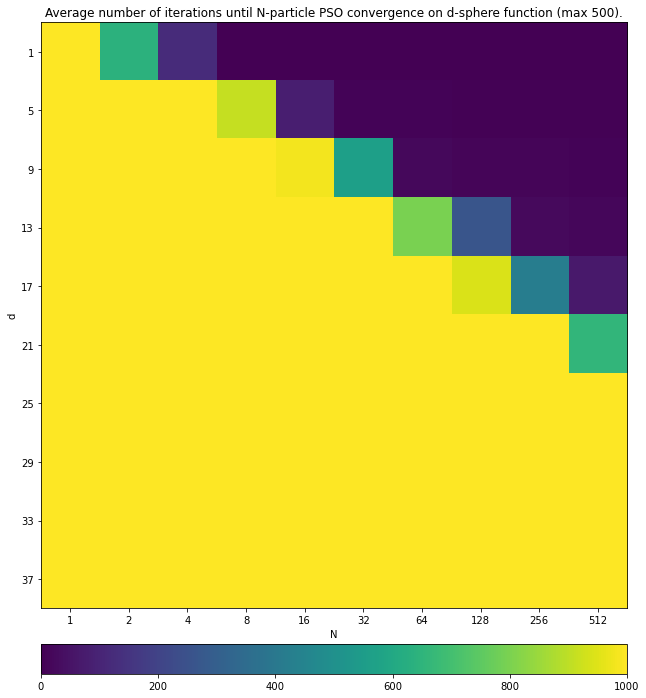

In [7]:
# Output Heatmap Sphere

fig, ax = plt.subplots(figsize=(10, 10))
hm = ax.imshow(np.transpose(AVG_ITER_SPHERE))

# Show all ticks
plt.xticks(ticks=np.arange(len(nlist)),labels=nlist)
plt.yticks(ticks=np.arange(len(dlist)),labels=dlist)
# Setting the labels of y axis.
ax.set_title("Average number of iterations until N-particle PSO convergence on d-sphere function (max 500).")
ax.set_xlabel("N")
ax.set_ylabel("d")
fig.tight_layout()

divider = make_axes_locatable(ax)
cax = divider.new_vertical(size="5%", pad=0.5, pack_start=True)
fig.add_axes(cax)
fig.colorbar(hm, cax=cax, orientation="horizontal")

plt.show()

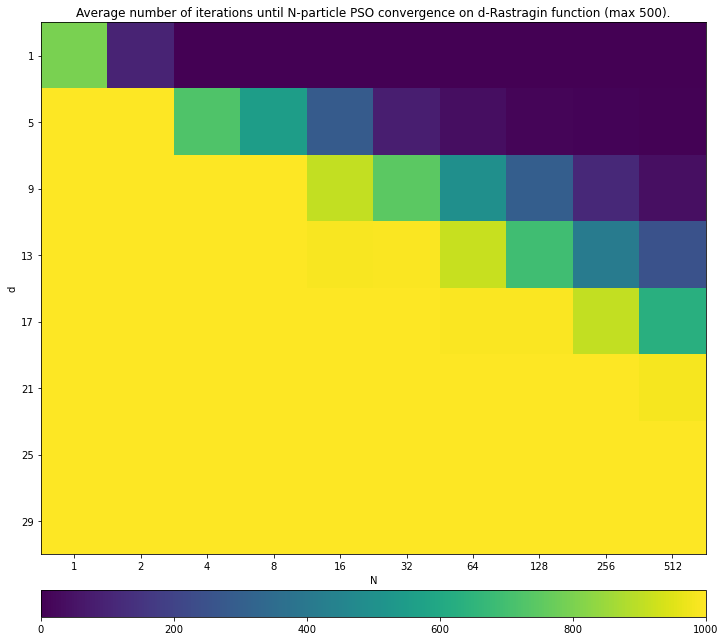

In [11]:
# Output Heatmap Sphere

fig, ax = plt.subplots(figsize=(10, 10))
hm = ax.imshow(np.transpose(AVG_ITER_RASTRI))

# Show all ticks
plt.xticks(ticks=np.arange(len(nlist)),labels=nlist)
plt.yticks(ticks=np.arange(len(dlist)),labels=dlist)
# Setting the labels of y axis.
ax.set_title("Average number of iterations until N-particle PSO convergence on d-Rastragin function (max 500).")
ax.set_xlabel("N")
ax.set_ylabel("d")
fig.tight_layout()

divider = make_axes_locatable(ax)
cax = divider.new_vertical(size="5%", pad=0.5, pack_start=True)
fig.add_axes(cax)
fig.colorbar(hm, cax=cax, orientation="horizontal")

plt.show()

In [618]:
# Problem 1: Analysis of Particle Swarm Optimisation (c) (10%)

# Packages
import numpy as np
import random as rand
import matplotlib.pyplot as plt

def sphere(d, x):
    return np.sum(x**2)

def rastrigin(d, x):
    return 10 * d + np.sum(x**2 - 10 * np.cos(2 * np.pi * x))

# Constants
d       = 8      # Dimension
N       = 80     # Number of particles
b       = 5.12   # Range
epsilon = 0.01 # A small number

iterations = 1000     # Maximum number of PSO iterations
trials     = 1        # Number of trials

def run(f, mod, w0, alpha=0, a1=0, a2=0):
    # Record fitness at each iteration 
    F_G  = np.zeros(iterations)

    for trial in range(trials): # For every trial
        # Mutable state
        X         = np.array([np.array([rand.uniform(-b, b) for _ in range(d)]) for _ in range(N)]) # Pos
        V         = np.array([np.zeros(d) for _ in range(N)]) # Vel
        P         = np.array([x for x in X])       # Pos PB
        F_p       = np.array([f(d, p) for p in P]) # PB fitness
        g         = P[np.argmin(F_p)]              # Pos GB
        f_g       = np.min(F_p)                    # GB fitness
        W         = w0 * np.ones((N, d))           # Inertial weights

        # Find minimum of objective function
        for itr in range(iterations):
            
            # Calculate fitness and update PBs and GB
            for i, x in enumerate(X):
                f_i = f(d, x)
                if f_i < F_p[i]: # Personal best
                    P[i] = x
                    F_p[i] = f_i
                if f_i < f_g: # Global best
                    g = x
                    f_g = f_i
                    
            # Record f_g at this time
            F_G[itr] += f_g

            # Update inertial parameter
            if mod:
                ISA = np.abs(P - X) / (np.abs(P - g) + epsilon)
                W = 1 - alpha / (1 + np.exp(-ISA))

            # Update velocity and position
            for i, v in enumerate(V):

               # Velocity update
                r1 = np.array([rand.uniform(0, 1) for _ in range(d)])
                r2 = np.array([rand.uniform(0, 1) for _ in range(d)])
                V[i] = W[i] * v + a1 * r1 * (P[i] - X[i]) + a2 * r2 * (g - X[i])
                X[i] = X[i] + V[i]
                
                # If exiting bounds, random re-initialise
                for x_i in X[i]:
                    if x_i < -b or b < x_i:
                        X[i] = np.array([rand.uniform(-b, b) for _ in range(d)])
                        break
    return F_G

In [545]:
# OUTPUT AVG
AVG_F_G_SPH = run(sphere, mod=False, w0=0.304, a1=1.989, a2=1.799) / trials
#AVG_F_G_RAS = run(rastrigin, mod=False, w0=-0.342, a1=1.25, a2=0.881) / trials



In [655]:
AVG_F_G_SPH_M = run(sphere, mod=True, w0=1, alpha=0.98, a1=1.989, a2=0.9) / trials
#AVG_F_G_RAS_M = run(rastrigin, mod=True, w0=1, alpha=0.750, a1=1.25, a2=0.44) / trials



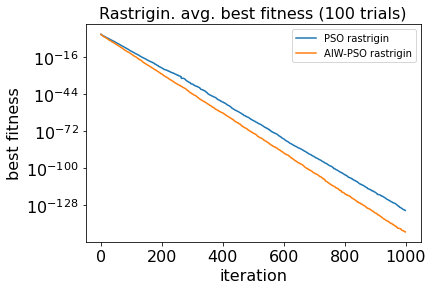

In [656]:
plt.rc('xtick', labelsize=16) 
plt.rc('ytick', labelsize=16) 
fig, ax = plt.subplots()
ax.set_title("Rastrigin. avg. best fitness (100 trials)", size=16)
ax.set_xlabel("iteration", size=16)
ax.set_ylabel("best fitness", size=16)

plt.plot(list(range(iterations)), AVG_F_G_SPH, label="PSO rastrigin")
#plt.plot(list(range(iterations)), AVG_F_G_SPH, label="PSO sphere")
plt.plot(list(range(iterations)), AVG_F_G_SPH_M, label="AIW-PSO rastrigin")
#plt.plot(list(range(iterations)), AVG_F_G_SPH_M, label="AIWPSO sphere")
plt.semilogy()
plt.legend()
plt.show()

In [305]:
print(AVG_F_G_SPH[100000])

plt.plot(list(range(iterations)), AVG_F_G_SPH, label="PSO sphere")

#plt.plot(list(range(iterations)), AVG_F_G_RAS, label="PSO rastrigin")
plt.plot(list(range(iterations)), AVG_F_G_SPH_M, label="AIWPSO sphere")
#plt.plot(list(range(iterations)), AVG_F_G_RAS_M, label="AIWPSO rastrigin")
plt.semilogx()
plt.legend()
plt.show()

IndexError: index 100000 is out of bounds for axis 0 with size 150

In [192]:
X = [1, 2, 3]
Y = X # Y references the same list of numbers in memory
Y[2] = 4
print(X)

[1, 2, 4]
